In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END

#reducers --> add_message (package)
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
# in form of key value pair 
class state_ones(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["LANGCHAIN_API_KEY"]=os.getenv("LANGCHAIN_API_KEY")


In [4]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="llama-3.1-8b-instant")


In [5]:


## START WITH THE NODES
## REDUCERS 
def Superbot(C_state:state_ones):
    return {"messages":[llm.invoke(C_state['messages'])]}    

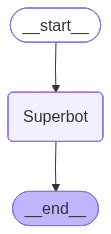

In [6]:

from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image,display

graph=StateGraph(state_ones)
#node
graph.add_node("Superbot",Superbot)

#edges
graph.add_edge(START,"Superbot")
graph.add_edge("Superbot",END)

memory=MemorySaver()
graph_wih_mem=graph.compile(checkpointer=memory)

display(Image(graph_wih_mem.get_graph().draw_mermaid_png()))


In [12]:
config={"configurable":{"thread_id":"1"}}

In [13]:
graph_wih_mem.invoke({"messages":"Hi myname is atharv and i like mangas"},config)

{'messages': [HumanMessage(content='Hi myname is atharv and i like mangas', additional_kwargs={}, response_metadata={}, id='b55ef432-8640-4f5d-bc4c-d97c38b625b5'),
  AIMessage(content="Nice to meet you, Atharv.  Manga is a great interest to have - it's a rich and diverse medium with a wide range of genres and styles. What kind of manga do you enjoy reading? Are you a fan of action-packed series like 'Naruto' or 'One Piece', or do you prefer more slice-of-life stories like 'Barakamon' or 'Silver Spoon'?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 47, 'total_tokens': 130, 'completion_time': 0.134710857, 'prompt_time': 0.002711604, 'queue_time': 0.048221496, 'total_time': 0.137422461}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_c54ae48ece', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--f6a86182-6e3e-4f58-bbb4-fce37b756c37-0', usage_metadata={'input_tokens': 47, 'output_tokens'

## STREAMING ##

In [ ]:
config={"configurable":{"thread_id":"2"}}

for chunk in graph_wih_mem.stream({"messages":"Hi myname is atharv and i liake to make videos"},config,stream_mode="updates"):
    print(chunk)

{'Superbot': {'messages': [AIMessage(content="Hello Atharv, nice to meet you. It's great that you enjoy making videos. What kind of videos do you like to make? Are you into vlogging, creating tutorials, or something else?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 48, 'total_tokens': 91, 'completion_time': 0.050598606, 'prompt_time': 0.002741116, 'queue_time': 0.053679454, 'total_time': 0.053339722}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_8804b970d6', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--586b73aa-303c-4ee2-a60c-0cf3d6509c23-0', usage_metadata={'input_tokens': 48, 'output_tokens': 43, 'total_tokens': 91})]}}


In [15]:

config={"configurable":{"thread_id":"2"}}

for chunk in graph_wih_mem.stream({"messages":"Hi myname is atharv and i liake to make videos"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi myname is atharv and i like to make videos', additional_kwargs={}, response_metadata={}, id='6dd4669b-b3d5-4ec2-a310-f25d1049af98'), AIMessage(content="Hello Atharv, nice to meet you. It's great that you enjoy making videos. What kind of videos do you like to make? Are you into vlogging, creating tutorials, or something else?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 48, 'total_tokens': 91, 'completion_time': 0.050598606, 'prompt_time': 0.002741116, 'queue_time': 0.053679454, 'total_time': 0.053339722}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_8804b970d6', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--586b73aa-303c-4ee2-a60c-0cf3d6509c23-0', usage_metadata={'input_tokens': 48, 'output_tokens': 43, 'total_tokens': 91}), HumanMessage(content='Hi myname is atharv and i liake to make videos', additional_kwargs={}, response_metadata={},

In [17]:

config={"configurable":{"thread_id":"2"}}

for chunk in graph_wih_mem.stream({"messages":"And read books "},config,stream_mode="updates"):
    print(chunk)

{'Superbot': {'messages': [AIMessage(content="It seems like you mentioned reading books again. Is there a particular book or author that you're currently enjoying or would like to discuss?\n\nIf you're open to sharing, I'd be happy to chat with you about books or video-making.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 49, 'prompt_tokens': 238, 'total_tokens': 287, 'completion_time': 0.098641795, 'prompt_time': 0.014178699, 'queue_time': 0.050995161, 'total_time': 0.112820494}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_8804b970d6', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--c2dca76b-517f-4bb2-9bed-ef5701708107-0', usage_metadata={'input_tokens': 238, 'output_tokens': 49, 'total_tokens': 287})]}}


In [18]:

config={"configurable":{"thread_id":"2"}}

for chunk in graph_wih_mem.stream({"messages":"I love none "},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi myname is atharv and i like to make videos', additional_kwargs={}, response_metadata={}, id='6dd4669b-b3d5-4ec2-a310-f25d1049af98'), AIMessage(content="Hello Atharv, nice to meet you. It's great that you enjoy making videos. What kind of videos do you like to make? Are you into vlogging, creating tutorials, or something else?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 48, 'total_tokens': 91, 'completion_time': 0.050598606, 'prompt_time': 0.002741116, 'queue_time': 0.053679454, 'total_time': 0.053339722}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_8804b970d6', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--586b73aa-303c-4ee2-a60c-0cf3d6509c23-0', usage_metadata={'input_tokens': 48, 'output_tokens': 43, 'total_tokens': 91}), HumanMessage(content='Hi myname is atharv and i liake to make videos', additional_kwargs={}, response_metadata={},